In [5]:
!pip install stepic
!pip install pycryptodome


/bin/bash: /home/ansh-yadav/.miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ansh-yadav/.miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


📝 Original Message: Hello
🔐 Encrypted Message Bytes: b'\x81\r\xa1\x94\xfe\x0b\xd9\x9c\xc4W\xd6>b\xd5\x98\xf3\xf4\xb0U\xe1B+\xaa\x85\x8f\x8e\x19]\xf7\xcd\xd2\xc7\xa0\x03\xd7\x0b\xac\xe6{\x1b\xb5\x08@\x99\xb0D\xe9\x99[X@\xb6\xd2Nk\xedQ\xc5\xaf\xd1\x96.J\xf1\x03\n)\xce\x1dX\xca]\xf7k\xe8D\xa7y%\xbd\xd00\xd9QqFh\xa2K\xd3\xc6:\x1c\xdcp\x82\xdb\xd6u\xe1\x03\x89\xbc\x82s{\xb8\x04F\xe6A\xe5mD4>\xef\x80A\x8d\r\x80e}\x1f\xa6\rx\xd4W#\x86\\\xaf!C\x91"\xb6\x994\xce\xb17\x92\xfa\xffj\xe4\x05o\x99\r3*\x9e\xe0\x983\xb2\xd2\xd2\x0b\x00\xc5\x19\xfb\x91\x7f\xdb,\xbfn\xcc\x16\xf2\x1c6\xbb\xad\\\xd7TsE\xfbR\xc8\x89\x04\x04\x86,Q8!\xc3\xcf\x1cZ`q\xa2\xdcn\xaa\x0b\xe2\x87l#n\xca8J\xff\xbcD\xa4\x9c\xa8\xe4L\xa5h\xa8W\x10\xc7\x1b\x1c\xcbvD\xcb\xb0\x863\x1d%\x9d\xd9\x16\x1c_\xfe\xa5\x89\xaa\x9c\x02A\xf1\xf8\xfcV'
🖼️ Encrypted message hidden and image saved as: /kaggle/working/encoded_image.png


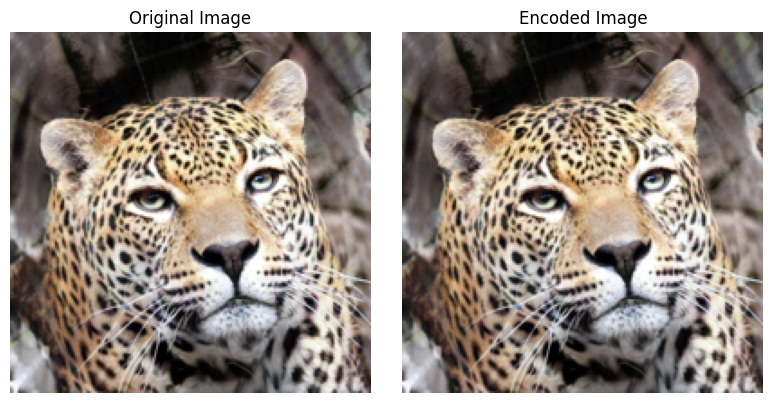

🔓 Decrypted Message: Hello


In [9]:
from PIL import Image
import stepic
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import matplotlib.pyplot as plt

# Step 1: Take message input from the user
message = input("📥 Enter the message you want to encrypt and store in image: ")
print("📝 Original Message:", message)

# Step 2: Generate RSA key pair
key = RSA.generate(2048)
private_key_pem = key.export_key().decode()
public_key_pem = key.publickey().export_key().decode()

# Load keys from PEM
private_key = RSA.import_key(private_key_pem)
public_key = RSA.import_key(public_key_pem)

# Step 3: Encrypt message using RSA + OAEP
cipher_encrypt = PKCS1_OAEP.new(public_key)
encrypted_message = cipher_encrypt.encrypt(message.encode())  # Output is in bytes
print("🔐 Encrypted Message Bytes:", encrypted_message)

# Step 4: Load image and store encrypted message inside
image = Image.open("./static/seed7680.png")  # Use a PNG image
encoded_image = stepic.encode(image, encrypted_message)

# Step 5: Save the encoded image to Kaggle working directory
encoded_image.save("./static/seed7681.png")
print("🖼️ Encrypted message hidden and image saved as: /kaggle/working/encoded_image.png")

# Step 6: Load the encoded image from working directory
encoded = Image.open("./static/seed7681.png")

# Step 7: Resize and display original & encoded images side by side
original_image_resized = image.resize((200, 200))
encoded_image_resized = encoded.resize((200, 200))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(original_image_resized)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(encoded_image_resized)
axes[1].set_title("Encoded Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# Step 8: Extract and decrypt the message from image
extracted_encrypted_message = stepic.decode(encoded)

# If stepic returns string, convert to bytes
if isinstance(extracted_encrypted_message, str):
    extracted_encrypted_message = extracted_encrypted_message.encode('latin-1')  # stepic uses Latin-1

# Decrypt the extracted message
cipher_decrypt = PKCS1_OAEP.new(private_key)
decrypted_message = cipher_decrypt.decrypt(extracted_encrypted_message)
print("🔓 Decrypted Message:", decrypted_message.decode())

In [ ]:
from PIL import Image
import stepic
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import matplotlib.pyplot as plt

# Step 1: Take message input from user
message = input("📥 Enter the message you want to encrypt and store in image: ")
print("📝 Original Message:", message)

# Step 2: Generate RSA key pair
key = RSA.generate(2048)
private_key_pem = key.export_key().decode()
public_key_pem = key.publickey().export_key().decode()

# Step 3: Encrypt the message using the public key
cipher_encrypt = PKCS1_OAEP.new(RSA.import_key(public_key_pem))
encrypted_message = cipher_encrypt.encrypt(message.encode())  # Encrypted in bytes

# Step 4: Prepare data for Image 1 (message + public key)
# Use separator to distinguish message and key on decode
separator = b'---SPLIT---'
data_to_hide_1 = encrypted_message + separator + public_key_pem.encode('utf-8')

# Step 5: Prepare data for Image 2 (private key)
data_to_hide_2 = private_key_pem.encode('utf-8')

# Step 6: Load cover images
image1 = Image.open("./static/seed7680.png")
image2 = Image.open("./static/seed7681.png")

# Step 7: Encode data into images
encoded_image1 = stepic.encode(image1, data_to_hide_1)
encoded_image2 = stepic.encode(image2, data_to_hide_2)

# Step 8: Save encoded images
encoded_image1.save("./static/seed7680_encoded.png")
encoded_image2.save("./static/seed7681_encoded.png")
print("✅ Message + Public Key saved in: seed7680_encoded.png")
print("✅ Private Key saved in: seed7681_encoded.png")

# Step 9: Display the two encoded images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(encoded_image1.resize((200, 200)))
axes[0].set_title("Image 1: Msg + Public Key")
axes[0].axis("off")

axes[1].imshow(encoded_image2.resize((200, 200)))
axes[1].set_title("Image 2: Private Key")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# 🧪 Optional: To test decoding and decrypting
# Step 10: Decode from images
decoded1 = stepic.decode(Image.open("./static/seed7680_encoded.png"))
decoded2 = stepic.decode(Image.open("./static/seed7681_encoded.png"))

# Step 11: Reconstruct encrypted message and keys
decoded1_bytes = decoded1.encode('latin-1')
decoded2_bytes = decoded2.encode('latin-1')

# Split encoded message and public key
split_data = decoded1_bytes.split(separator)
extracted_encrypted_message = split_data[0]
extracted_public_key_pem = split_data[1].decode('utf-8')
extracted_private_key_pem = decoded2_bytes.decode('utf-8')

# Step 12: Decrypt message using extracted private key
extracted_private_key = RSA.import_key(extracted_private_key_pem)
cipher_decrypt = PKCS1_OAEP.new(extracted_private_key)
decrypted_message = cipher_decrypt.decrypt(extracted_encrypted_message)

print("🔓 Decrypted Message:", decrypted_message.decode())
